In [47]:
import pandas as pd
import numpy as np

In [48]:
df = pd.read_csv("sms-spam.csv")
df.head() # check the first 5 rows


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [49]:
df.tail() # check the last 5 rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [50]:
df.sample(5) # check 5 random rows

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5058,spam,Free video camera phones with Half Price line ...,NaN,NaN,NaN
5248,ham,U come n search tat vid..not finishd..,NaN,NaN,NaN
1285,ham,"Just wondering, the others just took off",NaN,NaN,NaN
1860,ham,"It could work, we'll reach a consensus at the ...",NaN,NaN,NaN
1918,ham,Is fujitsu s series lifebook good?,NaN,NaN,NaN


In [51]:
df.columns # check the columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [52]:
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True) # drop the columns

In [53]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [54]:
df.rename(columns={'v1':'result', 'v2':'input'}, inplace= True)

In [55]:
df.head()

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
df['result'].value_counts()

result
ham     4825
spam     747
Name: count, dtype: int64

In [57]:
# df.isnull()
df.isnull().sum()

result    0
input     0
dtype: int64

In [58]:
df.duplicated().sum() # calculate the number of duplicates


np.int64(403)

In [59]:
df =df.drop_duplicates() #delete duplicates

In [60]:
df.duplicated().sum()

np.int64(0)

In [61]:
df.head()

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [62]:
df['result'] = df['result'].map({'ham': 0, 'spam': 1})
# encoder = LabelEncoder()
# df['result'] = encoder.fit_transform(df['result'])


In [63]:
df.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### EDA (Exploratory Data Analysis)

In [64]:
df.result.value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [65]:
df.shape # check the shape of the dataframe rows, columns

(5169, 2)

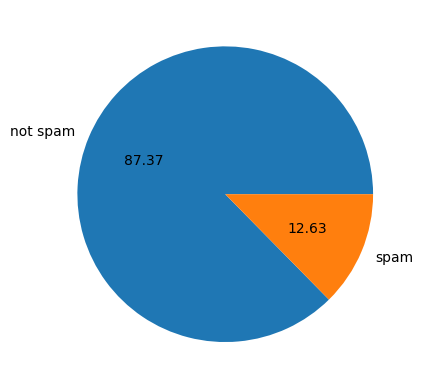

In [66]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(), labels = ['not spam', 'spam'], autopct= '%.2f')
plt.show()

In [67]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [68]:
import nltk

In [69]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/agrit/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/agrit/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /home/agrit/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /home/agrit/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /home/agrit/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]   

True

In [70]:
df = df.replace({"ham": 0, "spam": 1})

In [71]:
df.head(10)

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


In [72]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/agrit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/agrit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [73]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score 

In [74]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/agrit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [75]:
#creating a new column with count of characters
df['countCharacters'] = df['input'].apply(len)

#creating a new column with count of words
df['countWords'] = df['input'].apply(lambda x: len(nltk.word_tokenize(x)))

#creating a new column with count of sentences
df['countSentences'] = df['input'].apply(lambda x: len(nltk.sent_tokenize(x)))

# 'sent_tokenize' is used to split the text into sentences and return a list of sentences


In [76]:
df.head()

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [77]:
df[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
df[df['result']== 0][['countCharacters','countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [79]:
df[df['result']== 1][['countCharacters','countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='countCharacters', ylabel='Count'>

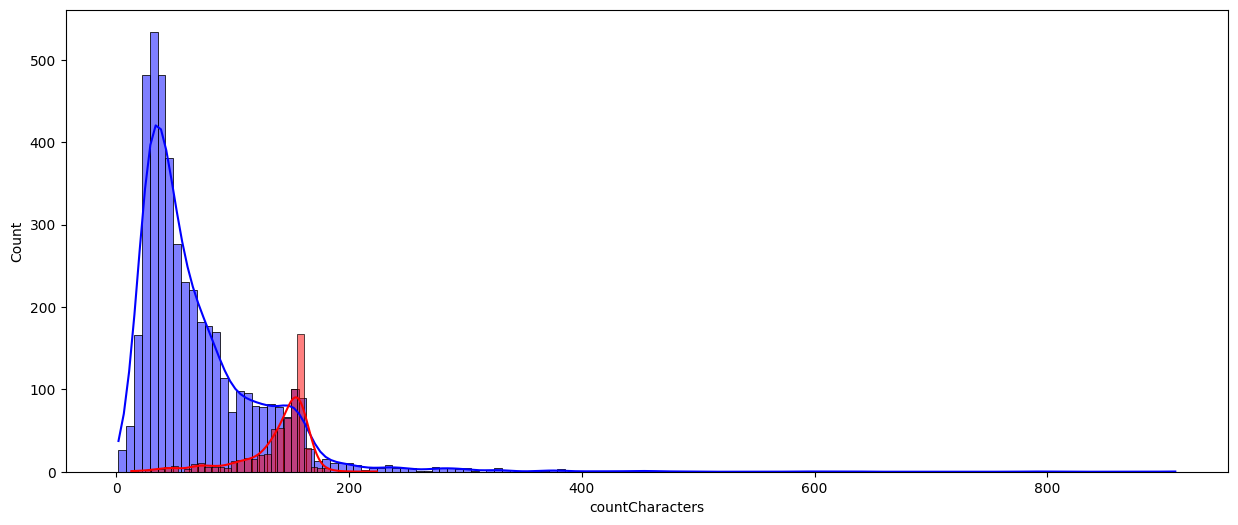

In [80]:
plt.figure(figsize=(15, 6))
sns.histplot(df[df['result']== 0]['countCharacters'], color='blue', kde=True)
sns.histplot(df[df['result']== 1]['countCharacters'], color='red', kde=True)

<Axes: xlabel='countWords', ylabel='Count'>

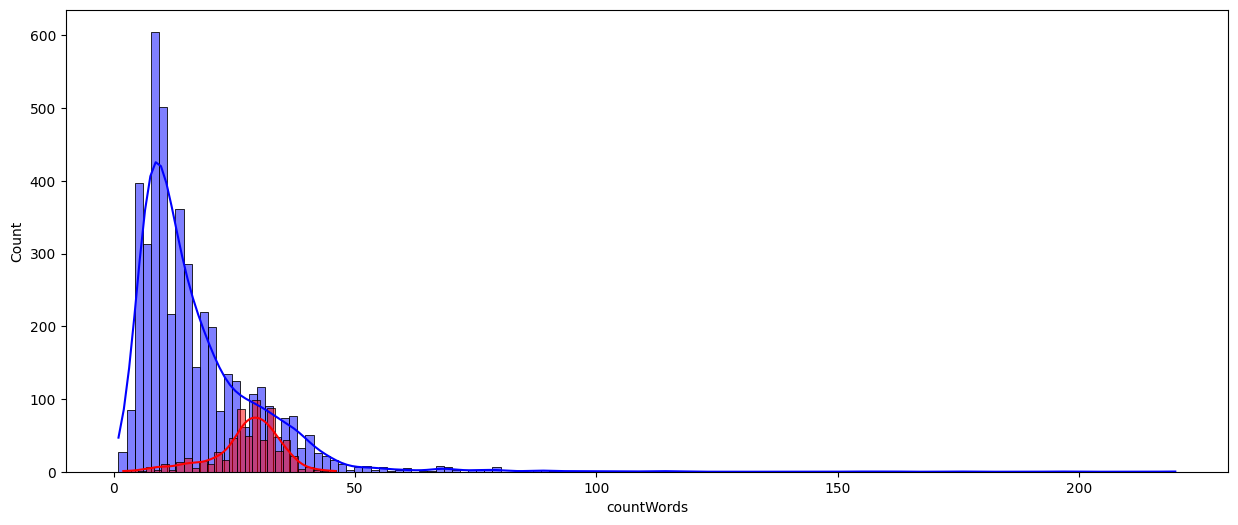

In [81]:
plt.figure(figsize=(15, 6))
sns.histplot(df[df['result']== 0]['countWords'], color='blue', kde=True)
sns.histplot(df[df['result']== 1]['countWords'], color='red', kde=True)

<Axes: xlabel='countSentences', ylabel='Count'>

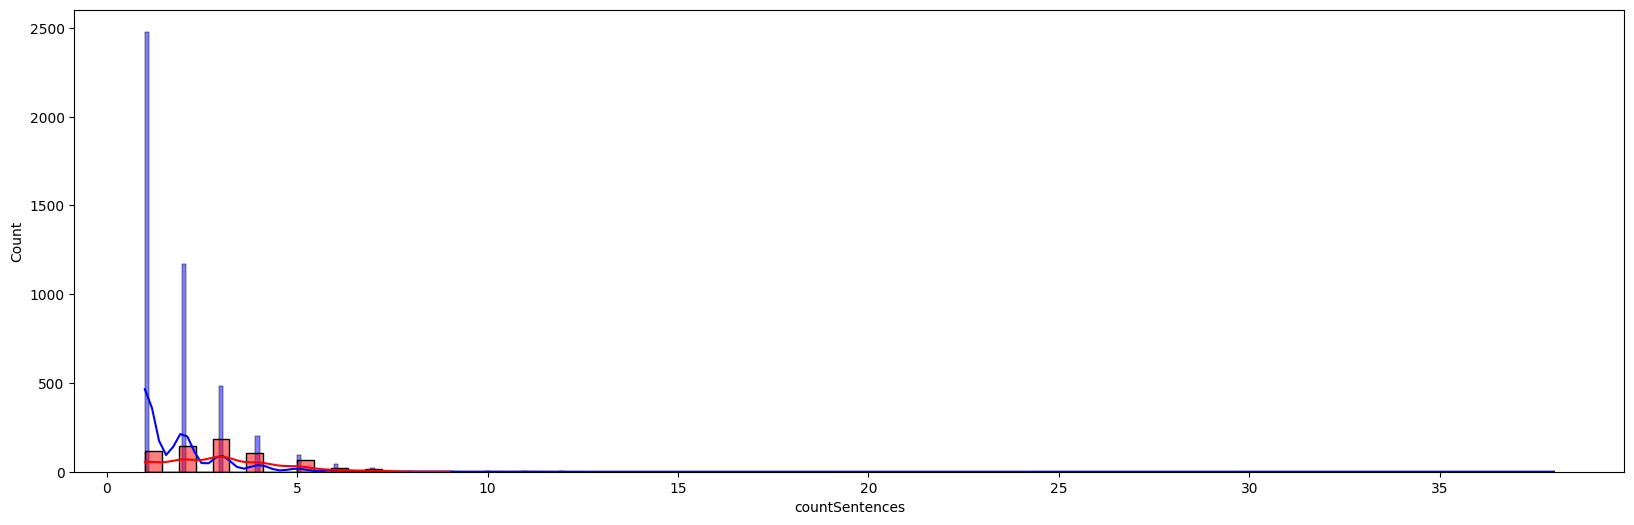

In [82]:
plt.figure(figsize=(20, 6))
sns.histplot(df[df['result']== 0]['countSentences'], color='blue', kde=True)
sns.histplot(df[df['result']== 1]['countSentences'], color='red', kde=True)

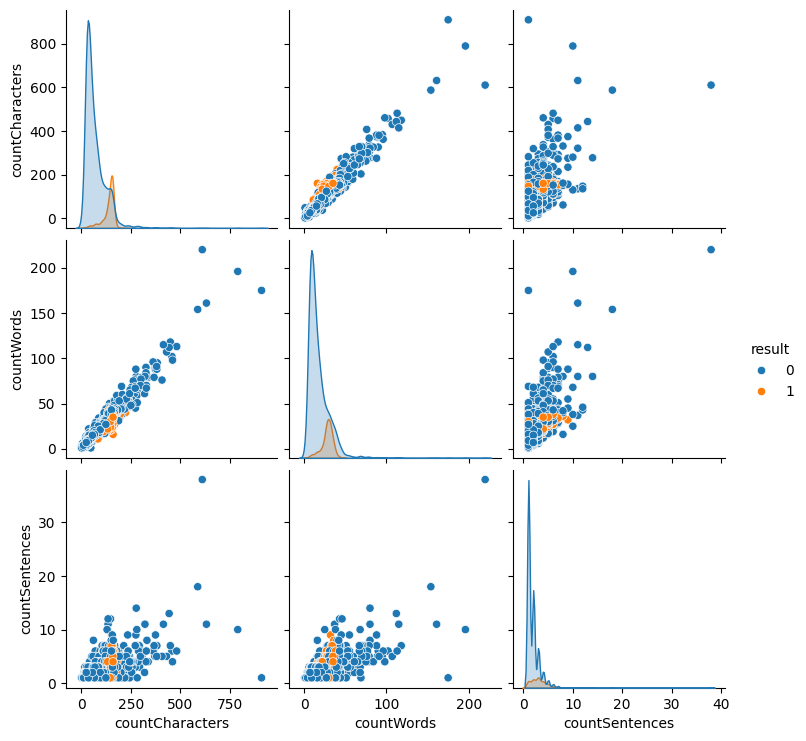

In [83]:
sns.pairplot(df, hue='result')

## Data PreProcessing

In [84]:
def transform_text (text):
    
    #converting to lower case
    text = text.lower()
    
    #tokenization
    text = nltk.word_tokenize(text)
    
    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
            
    #updating the text after removed special characters
    text = removedSC[:]
    
    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)
            
    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]
    
    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

In [85]:
transform_text("I am Shyam Tripathi")

'shyam tripathi'

In [86]:
from nltk.corpus import stopwords

In [87]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
# will create a new column with the processed text
df['processed_text'] = df['input'].apply(transform_text)

df.head()

,result,input,countCharacters,countWords,countSentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [89]:
# will be creating word cloud for data visualization to display most frequent words in the processed dataset
#using 'WordCloud' class of 'wordcloud' module

wc = WordCloud(width=800, height=400, min_font_size= 10, background_color='white')

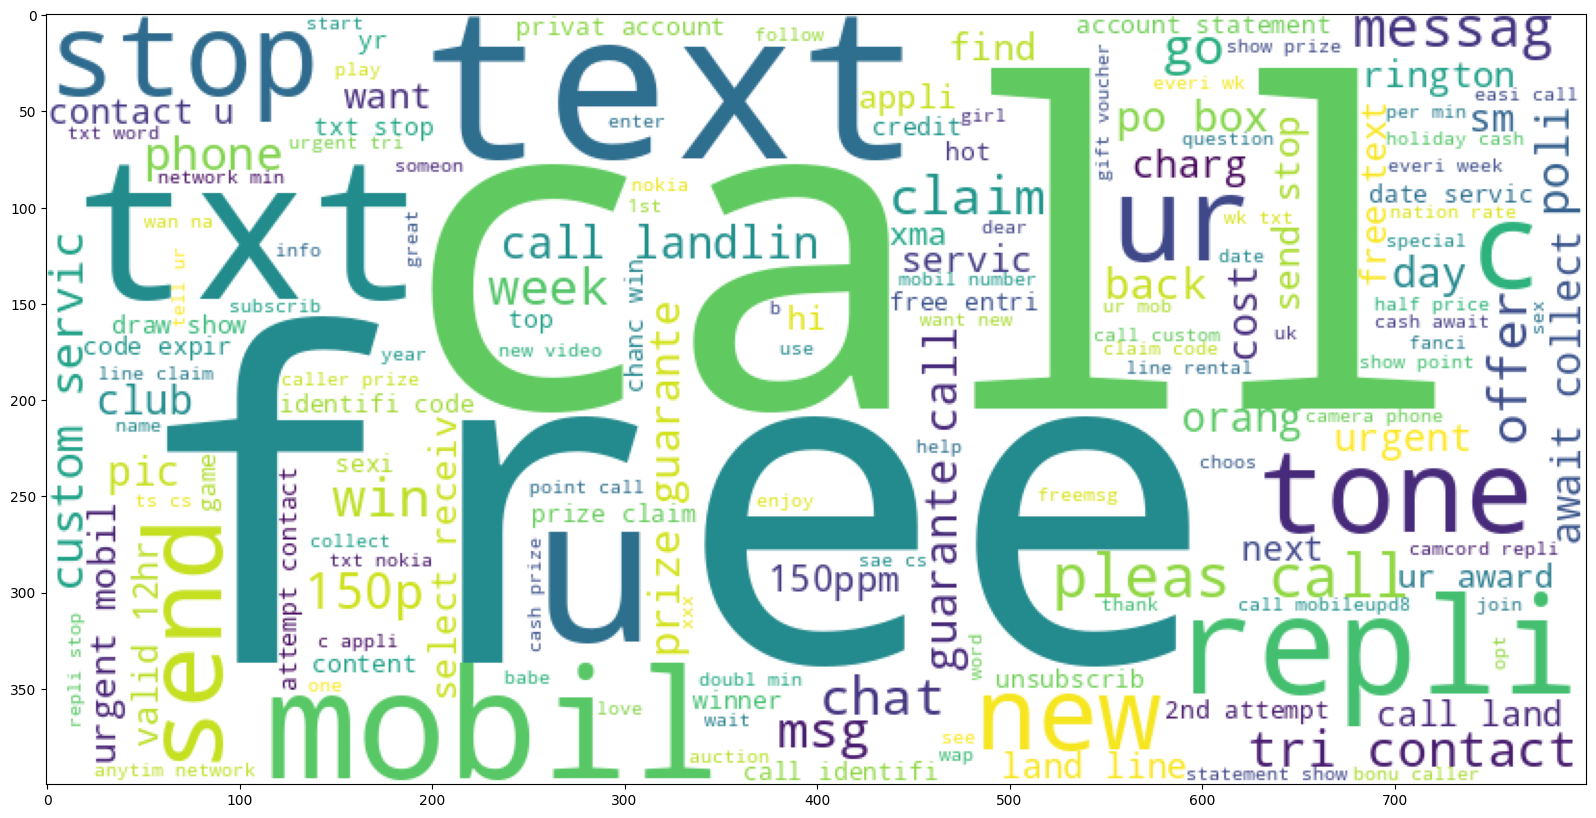

In [90]:
# creating wrod cloud for spam messages
spamWC = wc.generate(df[df['result']== 1]['processed_text'].str.cat(sep=" "))

plt.figure(figsize=(20, 10))
plt.imshow(spamWC)

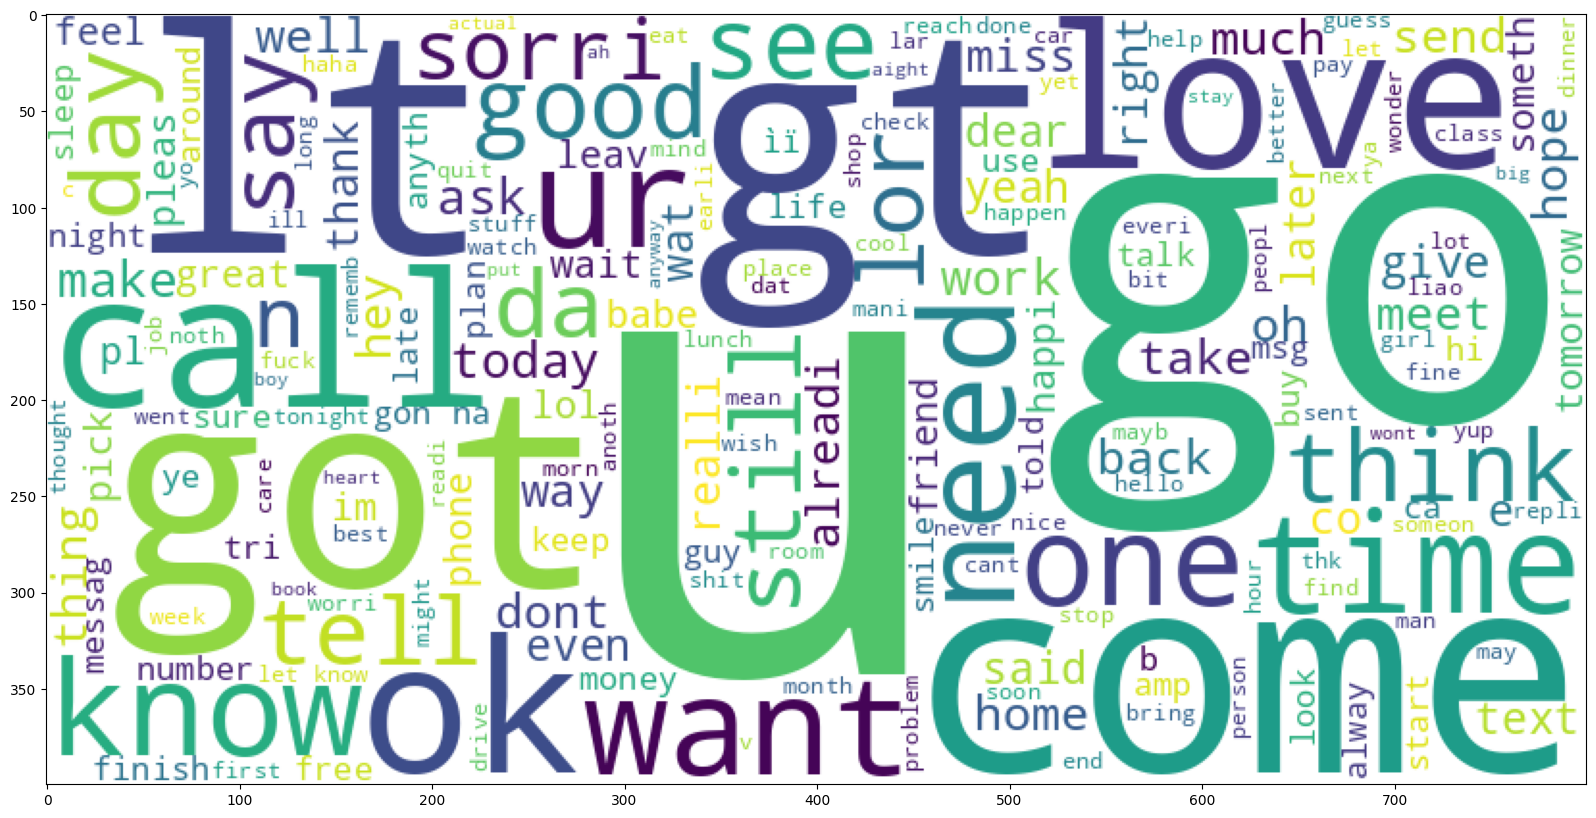

In [91]:
#create word cloud for ham messages
hamWC = wc.generate(df[df['result']== 0]['processed_text'].str.cat(sep=" "))
plt.figure(figsize=(20, 10))
plt.imshow(hamWC)

In [92]:
#extracting the most common words from the processed text in both spam and not spam messages

In [93]:
#extracting all the words usind in speam messages

spamWords = list()

for msf in df[df['result']== 1]['processed_text'].tolist():
    for word in msf.split():
        spamWords.append(word)

spamWords

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [94]:
#to count the frequency of the words, we will use   'Counter' class of 'collections' module
spamWordsDict = Counter(spamWords)

# to extract the most common words, we will use 'most_common()' method of 'Counter' class

spamWordsDict.most_common(40)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45),
 ('custom', 42),
 ('messag', 42),
 ('guarante', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('msg', 35),
 ('draw', 35),
 ('number', 35),
 ('cs', 35)]

In [95]:
#convert the dictionary to a dataframe

In [96]:
mostCommonSpamWords = pd.DataFrame(spamWordsDict.most_common(40), columns=['word', 'frequency'])

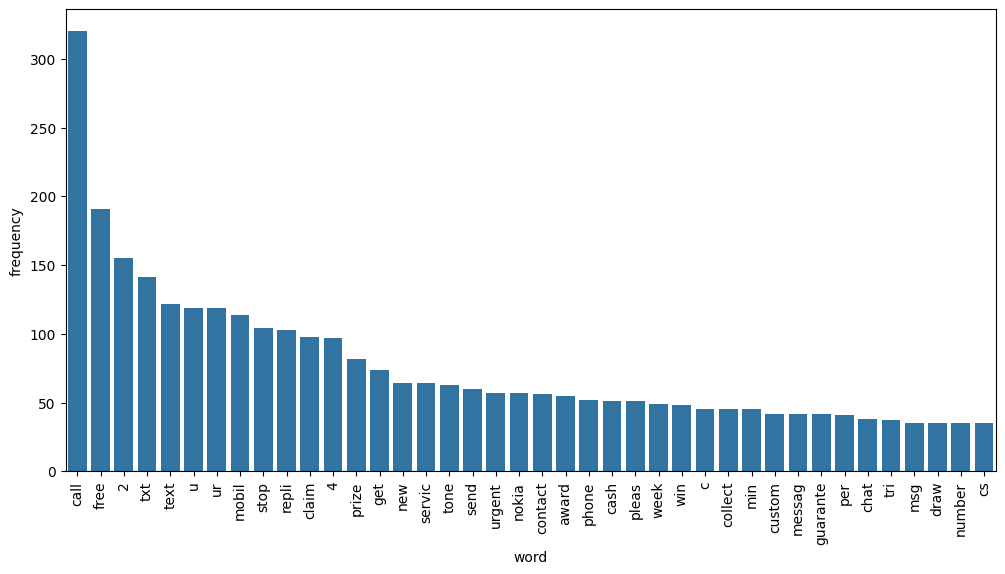

In [97]:
# plotting a bar plot of the most common words in spam messages dataframe
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='frequency', data=mostCommonSpamWords)
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [98]:
#words like 'CALL', 'FREE', '2', 'TXT', 'TEXT', 'UR', 'MOBIL' are the most common words in SPAM texts

In [99]:
#NiaveBayes classifier is used to classify the messages as spam or not spam, It works BEST on textual data, so will firstly perform it on the dataset

#### we need to give numerical inputs to the classfier model, so will have to convert the 'Proecessed' column into vectors.
#### using 'bag of words'

In [100]:
# convertint the collecto fo text into a matrix of toeknt counts
cv = CountVectorizer()

In [101]:
#transforming the data of processed column 
X = cv.fit_transform(df['processed_text']).toarray()

# print the size of X
X.shape

(5169, 6708)

In [102]:
# storing the values of the result column in y
y = df['result'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [103]:
# splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

In [104]:
#creating the objects for the models 
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [105]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))  
print(confusion_matrix(y_test, y_pred1))    
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [106]:
#training the dataset for MultinomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [107]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)   
print(accuracy_score(y_test, y_pred3)) 
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [108]:
#using 'TfidfVectorizer' class of 'sklearn.feature_extraction.text' module to convert the text data into a matrix of TF-IDF features
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(df['processed_text']).toarray()

y =  df['result'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)


In [109]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8597678916827853
[[775 124]
 [ 21 114]]
0.4789915966386555


In [110]:
#training the dataset for MultinomialNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [111]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [112]:
#model is PREPARED.
#now we have to host the websist, for that pipling needs to be done
# the text whichh we will get, has to be transformed and then the model will predict the result

In [113]:
# we will pickle 2 files
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))
